## 1-回归MLP

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

In [7]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(lr=1e-3),
             )

In [8]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 188us/sample - loss: 1.6321 - val_loss: 1.5903
Epoch 2/20
11610/11610 [==============================] - 1s 109us/sample - loss: 0.7124 - val_loss: 0.6539
Epoch 3/20
11610/11610 [==============================] - 1s 110us/sample - loss: 0.6348 - val_loss: 0.6039
Epoch 4/20
11610/11610 [==============================] - 1s 117us/sample - loss: 0.5983 - val_loss: 0.5738
Epoch 5/20
11610/11610 [==============================] - 1s 113us/sample - loss: 0.5713 - val_loss: 0.5406
Epoch 6/20
11610/11610 [==============================] - 1s 107us/sample - loss: 0.5482 - val_loss: 0.5221
Epoch 7/20
11610/11610 [==============================] - 1s 113us/sample - loss: 0.5298 - val_loss: 0.4965
Epoch 8/20
11610/11610 [==============================] - 1s 112us/sample - loss: 0.5138 - val_loss: 0.4843
Epoch 9/20
11610/11610 [==============================] - 1s 107us/sample - loss: 0.500

(0, 1)

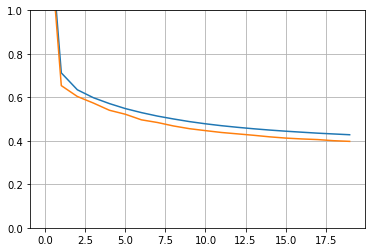

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [12]:
y_pred

array([[0.3689293],
       [1.6819053],
       [3.08865  ]], dtype=float32)

## 2-Functional API 函数式API

### 2-1 Wide & Deep Neural Network 宽深神经网络的构建

* 将上一层像函数一样传递给下一层输入。告诉 keras 模型应该如何连接。
* concatenate 层能合并两层的输出。
* Model 需要指定输入和输出。

In [13]:
"""
output
  |
concatenate <--
  |           |
hidden2       |
  |           |
hidden1       |
  |           |
input----------
"""

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2]) # 输入与hidden2进行合并
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           930         dense_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_3[0][0]                

In [15]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 166us/sample - loss: 1.8716 - val_loss: 2.0992
Epoch 2/20
11610/11610 [==============================] - 2s 131us/sample - loss: 0.6590 - val_loss: 0.8409
Epoch 3/20
11610/11610 [==============================] - 1s 129us/sample - loss: 0.5956 - val_loss: 0.6495
Epoch 4/20
11610/11610 [==============================] - 1s 127us/sample - loss: 0.5629 - val_loss: 0.6644
Epoch 5/20
11610/11610 [==============================] - 1s 126us/sample - loss: 0.5400 - val_loss: 0.6005
Epoch 6/20
11610/11610 [==============================] - 1s 125us/sample - loss: 0.5171 - val_loss: 0.8458
Epoch 7/20
11610/11610 [==============================] - 1s 119us/sample - loss: 0.5058 - val_loss: 0.4805
Epoch 8/20
11610/11610 [==============================] - 2s 130us/sample - loss: 0.4876 - val_loss: 0.5796
Epoch 9/20
11610/11610 [==============================] - 2s 131us/sample - loss: 0.479

In [16]:
mse_test

0.4177465671254683

### 2-2 处理多输入

In [17]:
"""
output
  |
concatenate <--
  |           |
hidden2       |
  |           |
hidden1       |
  |           |
inputB     inputA
"""
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [18]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:] # 分出前 5 列特征和后 6 列特征
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3] 

In [19]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, 
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test, verbose=0)
y_pred = model.predict((X_new_A, X_new_B))
mse_test

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 163us/sample - loss: 2.0042 - val_loss: 0.9797
Epoch 2/20
11610/11610 [==============================] - 1s 128us/sample - loss: 0.7905 - val_loss: 0.6946
Epoch 3/20
11610/11610 [==============================] - 2s 133us/sample - loss: 0.6507 - val_loss: 0.6242
Epoch 4/20
11610/11610 [==============================] - 1s 124us/sample - loss: 0.5985 - val_loss: 0.5876
Epoch 5/20
11610/11610 [==============================] - 2s 130us/sample - loss: 0.5668 - val_loss: 0.5435
Epoch 6/20
11610/11610 [==============================] - 2s 132us/sample - loss: 0.5418 - val_loss: 0.5263
Epoch 7/20
11610/11610 [==============================] - 1s 127us/sample - loss: 0.5223 - val_loss: 0.4988
Epoch 8/20
11610/11610 [==============================] - 1s 127us/sample - loss: 0.5064 - val_loss: 0.4843
Epoch 9/20
11610/11610 [==============================] - 1s 129us/sample - loss: 0.494

0.4301532077234845

### 2-3 处理多输出

In [30]:
"""
auxoutput   output
     |        |
     |      concatenate <--
     |        |           |
     ------ hidden2       |
              |           |
            hidden1       |
              |           |
            inputB     inputA
"""
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2) # 增设一个输出
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output]) # 增设一个输出

In [31]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, 
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 235us/sample - loss: 2.6066 - output_loss: 2.2474 - aux_output_loss: 5.8309 - val_loss: 5.6284 - val_output_loss: 5.7467 - val_aux_output_loss: 4.5393
Epoch 2/20
11610/11610 [==============================] - 2s 162us/sample - loss: 1.1271 - output_loss: 0.8400 - aux_output_loss: 3.7088 - val_loss: 2.1757 - val_output_loss: 2.0954 - val_aux_output_loss: 2.8899
Epoch 3/20
11610/11610 [==============================] - 2s 167us/sample - loss: 0.8878 - output_loss: 0.7051 - aux_output_loss: 2.5309 - val_loss: 1.3589 - val_output_loss: 1.2599 - val_aux_output_loss: 2.2451
Epoch 4/20
11610/11610 [==============================] - 2s 175us/sample - loss: 0.7847 - output_loss: 0.6572 - aux_output_loss: 1.9310 - val_loss: 0.9317 - val_output_loss: 0.8171 - val_aux_output_loss: 1.9594
Epoch 5/20
11610/11610 [==============================] - 2s 169us/sample - loss: 0.7267 - output_loss:

In [32]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test], verbose=0)
total_loss, main_loss, aux_loss

(0.48595873884452406, 0.43426433, 0.95177215)

In [33]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
y_pred_main, y_pred_aux

(array([[0.5224985],
        [1.8402138],
        [3.1243954]], dtype=float32),
 array([[1.1595098],
        [1.8550853],
        [2.4965496]], dtype=float32))

## 3-Subclassing API 子类API

* 当模型涉及循环、条件变化时，子类API更加合适
* 在构造函数中创建所需的层，在call()方法中执行计算

In [27]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs) # handles standard args
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

In [28]:
model.compile(loss='mse', loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, 
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test], verbose=0)
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 227us/sample - loss: 2.1100 - output_1_loss: 1.9863 - output_2_loss: 3.2151 - val_loss: 4.0259 - val_output_1_loss: 3.7478 - val_output_2_loss: 6.5122
Epoch 2/20
11610/11610 [==============================] - 2s 169us/sample - loss: 0.9323 - output_1_loss: 0.7991 - output_2_loss: 2.1296 - val_loss: 1.7076 - val_output_1_loss: 1.3559 - val_output_2_loss: 4.8667
Epoch 3/20
11610/11610 [==============================] - 2s 174us/sample - loss: 0.7795 - output_1_loss: 0.6719 - output_2_loss: 1.7466 - val_loss: 1.2000 - val_output_1_loss: 0.8755 - val_output_2_loss: 4.1164
Epoch 4/20
11610/11610 [==============================] - 2s 167us/sample - loss: 0.7009 - output_1_loss: 0.6114 - output_2_loss: 1.5052 - val_loss: 0.9276 - val_output_1_loss: 0.6435 - val_output_2_loss: 3.4811
Epoch 5/20
11610/11610 [==============================] - 2s 170us/sample - loss: 0.6451 - output_1_los

## 4-Saving and Restoring model

### 4-1 for sequential or functional models

In [35]:
# 请先运行一个顺序或函数式 keras 模型
model.save('./models/Keras2-model1.h5') # 保存模型

In [36]:
model = keras.models.load_model('./models/Keras2-model1.h5') # 加载模型

### 4-2 for subclassing models

* 你只能用 save_weights(), load_weights() 来保存和还原参数，但网络必须重新定义

* 若训练时间很长，但又需要定期保存模型，那么就需要用回调函数来告诉 fit() 保存模型。详见下一节